*Made a new notebook because the scales were very different.*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lmfit as lm
from scipy.stats import norm

data = pd.read_csv("data/NaIscanrate_20220415_out.csv") #Change to match local file name/location

0    0
Name: treshold, dtype: int64


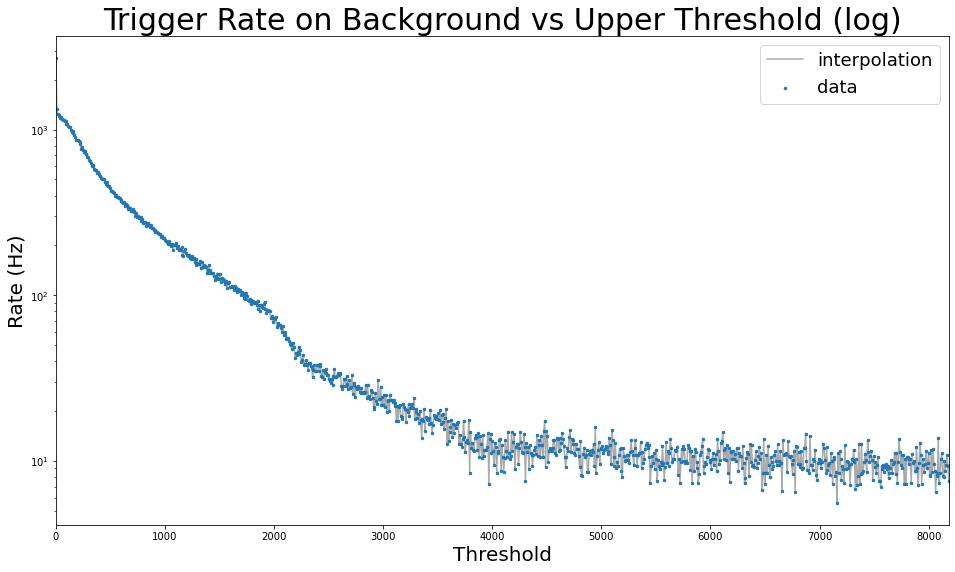

In [2]:
plt.figure(figsize=(16,9))

xdata = data.iloc[:,0]
ydata = data.iloc[:,1]

plt.scatter(xdata,ydata,s=6,label="data")
plt.plot(xdata,ydata,label="interpolation",zorder=0,color="#AAAAAA")
#plt.axvline(8192,color="green",label="8192")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold (log)",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(xdata.min(),xdata.max())
#plt.ylim(0)
plt.semilogy()

print(data.iloc[:,0][ydata == ydata.max()])

plt.legend(fontsize=18)
plt.show()

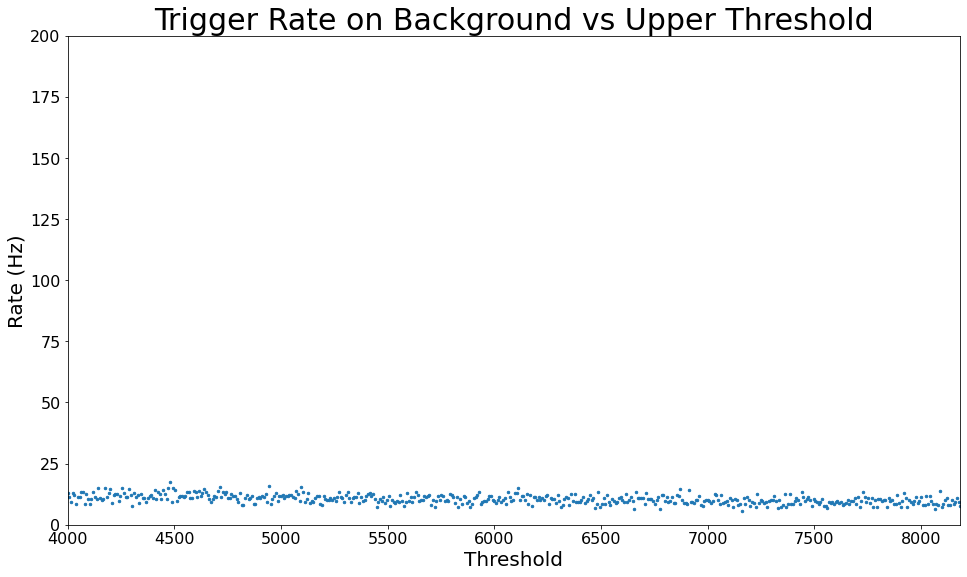

In [8]:
plt.figure(figsize=(16,9))

xdata = data.iloc[:,0]

plt.scatter(xdata,ydata,s=6,label="data")
#plt.plot(xdata,data.iloc[:,1],label="interpolation",zorder=0,color="#AAAAAA")
#plt.axvline(8192,color="green",label="8192")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(4000,xdata.max())
plt.ylim(0,200)

#plt.legend(fontsize=18)
plt.show()

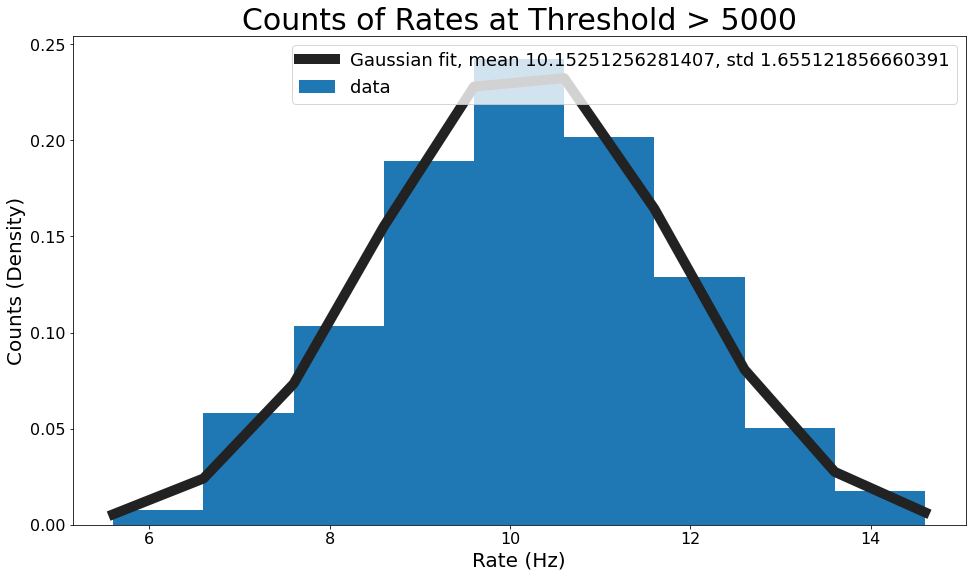

In [4]:
plt.figure(figsize=(16,9))

histdata = ydata[xdata>5000]
bins = np.arange(histdata.min(),histdata.max())

mean,std = norm.fit(histdata)

plt.hist(histdata,bins=bins,density=True,label="data")
plt.plot(bins,norm.pdf(bins,mean,std),label="Gaussian fit, mean "+str(mean)+", std "+str(std),color="#222222",linewidth=10)

plt.title("Counts of Rates at Threshold > 5000",size=30)
plt.xlabel("Rate (Hz)",size=20)
plt.ylabel("Counts (Density)",size=20)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels

plt.legend(fontsize=18)
plt.show()

In [5]:
def model(x,m,b): 
    return m*x+b
l_mod = lm.Model(model)
params = l_mod.make_params(m=0, b=100)
l_fit = l_mod.fit(histdata, params, x=xdata[xdata>5000])
l_fit #Print fit info

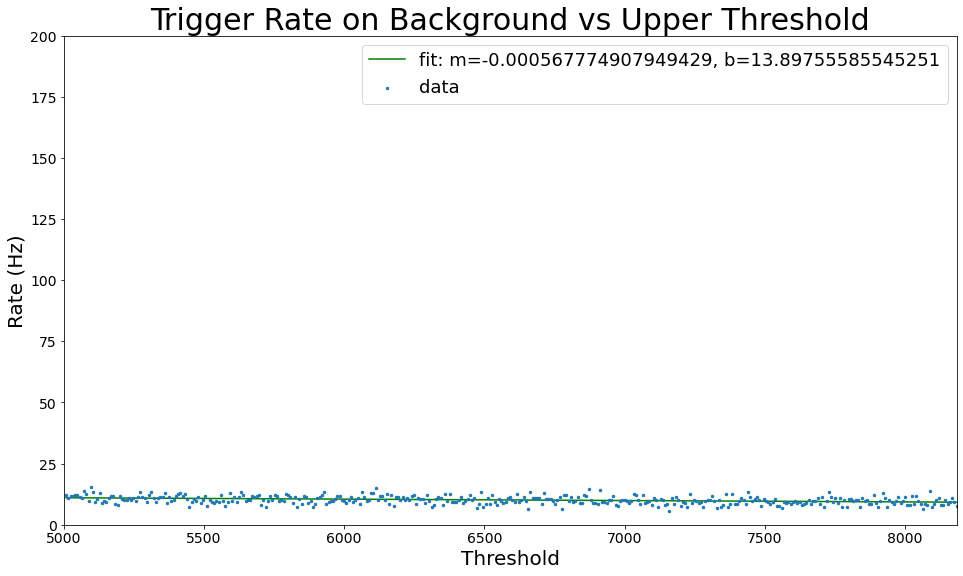

In [6]:
l_curve = l_fit.best_values['m']*xdata[xdata>5000]+l_fit.best_values['b']

plt.figure(figsize=(16,9))

xdata = data.iloc[:,0]

plt.scatter(xdata[xdata>5000],histdata,s=6,label="data")
plt.plot(xdata[xdata>5000],l_curve,label="fit: m="+str(l_fit.best_values['m'])+", b="+str(l_fit.best_values['b']),zorder=0,color="green")
#plt.axvline(8192,color="green",label="8192")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(5000,xdata.max())
plt.ylim(0,200)

plt.legend(fontsize=18)
plt.show()